In [1]:
# df (MT.pickle) is generated by build_df_of_companies.py
# ==Recent== data on 7505 companies by [ticker, name, industry, country, PB, PS, PE]

import os
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import re, requests, json, pickle


df = pd.read_pickle("MT.pickle")
print(f'Shape: {df.shape[0]}')
df.head()

Shape: 7503


,ticker,zacks_x_ind_desc,comp_name,comp_name_2,country_code,market_val,pe_ratio_12m,price_per_sales,price_book,div_yield,cons_recom_curr,held_by_insiders_pct,held_by_institutions_pct,link
0,GOOG,Internet Services,alphabet,Alphabet,United States,962574.38,31.12,5.80,4.64,0.00,1.27,12.99,32.42,<a href='https://www.macrotrends.net/stocks/ch...
1,GOOGL,Internet Services,alphabet,Alphabet,United States,958615.81,31.00,5.77,4.62,0.00,1.23,13.20,33.78,<a href='https://www.macrotrends.net/stocks/ch...
2,FB,Internet Services,facebook,Facebook,United States,709412.13,30.41,9.44,6.42,0.00,1.17,14.14,65.31,<a href='https://www.macrotrends.net/stocks/ch...
3,TCEHY,Internet Services,tencent-holding,Tencent Holding,China,627626.31,48.16,10.36,7.32,0.21,1.00,0.00,0.51,<a href='https://www.macrotrends.net/stocks/ch...
4,SHOP,Internet Services,shopify,Shopify,Canada,110344.93,13125.86,53.05,23.84,0.00,2.33,0.00,59.45,<a href='https://www.macrotrends.net/stocks/ch...


In [2]:
# this cell gets key financial ratios by year (but not all)
# in real time

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import re, requests, json, pickle


def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

def get_financial_ratios(ticker, df):
    full_link = df[df.ticker == ticker].link.item().split('=\'')[1].split('\'>')[0]
    full_link = full_link.replace('_', '.')
    url = '/'.join(full_link.split('/')[:-1]) + '/financial-ratios'
    r = requests.get(url)
    t = r.text

    l = t.split('var originalData = ')
    l = l[1].split(']')
    l = l[0] + ']'

    freeFromTags = cleanhtml(l)
    return json.loads(freeFromTags)

ticker = 'LGF.A'
tmp = get_financial_ratios(ticker, df)
pd.DataFrame(tmp)

,field_name,popup_icon,2020-03-31,2019-03-31,2018-03-31,2017-03-31,2016-03-31,2015-03-31,2014-03-31,2013-03-31,2012-03-31,2011-03-31,2010-03-31,2009-03-31,2008-03-31,2007-03-31,2006-03-31,2005-03-31
0,Current Ratio,,0.86760,0.84390,0.73500,1.00030,0.49810,2.99900,2.13960,0.79320,0.95390,0.87370,0.75270,0.72780,2.64470,2.72730,1.95290,1.96340
1,Long-term Debt / Capital,,0.50930,0.50610,0.45630,0.55710,0.50770,0.61940,0.64870,0.64790,0.92740,0.75900,0.90980,0.93360,0.76320,0.66540,0.77210,0.82160
2,Debt/Equity Ratio,,1.19680,1.21840,0.96820,1.43500,1.85840,1.62760,2.01350,4.00230,18.69130,5.28240,14.57590,20.17240,3.22320,1.98830,3.38760,4.61480
3,Gross Margin,,42.77380,44.89340,44.06530,40.53410,39.70780,45.16590,47.93730,48.65230,42.78070,49.72290,47.77000,45.86540,51.43970,55.36850,51.44940,57.78650
4,Operating Margin,,0.07200,3.53210,6.02310,-0.50910,-1.06500,9.25990,9.88300,10.08360,2.10960,3.95080,3.34880,-9.63050,-4.41800,4.29430,1.62290,5.77480
5,EBIT Margin,,0.07200,3.53210,6.02310,-0.50910,-1.06500,9.25990,9.88300,10.08360,2.10960,3.95080,3.34880,-9.63050,-4.41800,4.29430,1.62290,5.77480
6,EBITDA Margin,,49.41130,49.49060,49.97940,46.03160,43.72500,47.57460,45.81250,46.73520,41.39060,39.44290,39.85850,23.48240,26.87180,29.79400,29.22060,32.60380
7,Pre-Tax Profit Margin,,-5.22110,-8.37110,3.60130,-4.19800,-1.43990,8.89310,7.03200,5.77410,-2.16830,-1.65060,-1.95060,-11.98400,-6.12800,3.59960,0.06240,3.42040
8,Net Profit Margin,,-4.84320,-7.72180,11.46980,0.46230,2.13850,7.57630,5.78030,8.57150,-2.46400,-1.91950,-2.03240,-12.16980,-6.42410,2.81330,0.64480,2.41990
9,Asset Turnover,,0.48920,0.43770,0.46040,0.34810,0.61220,0.72890,0.92240,0.98090,0.56940,1.00860,0.97530,0.87950,0.88510,0.85900,0.89760,0.98070


In [3]:
df[df.ticker == 'LGF.A']

,ticker,zacks_x_ind_desc,comp_name,comp_name_2,country_code,market_val,pe_ratio_12m,price_per_sales,price_book,div_yield,cons_recom_curr,held_by_insiders_pct,held_by_institutions_pct,link
3295,LGF.A,Movie & TV Production and Distribution,lions-gate-entertainment,Lions Gate Entertainment,United States,2036.96,11.85,0.54,0.75,0.00,1.67,24.97,34.34,<a href='https://www.macrotrends.net/stocks/ch...


In [4]:
# load the dump.txt and prepare it
"""RUN ONLY IF YOU WANT TO REBUILD THE BIG DATASET FROM THE SCRAPER'S DUMP!! """

# Df = pd.read_csv('dump.txt', header=None)
# Df.columns = ['indicator', 'ticker', 'date', 'value']
# Df["value"] = pd.to_numeric(Df["value"], errors='coerce')
# Df["date"] = pd.to_datetime(Df["date"], errors='coerce')

# # drop duplicate rows
# print(Df.shape[0])
# Df.drop_duplicates(keep='first', inplace=True)
# print(Df.shape[0])


# # Add to Df two new columns (company name, not ticker, and its corresponding industry)
# industries = df.zacks_x_ind_desc.to_list()
# tickers = df.ticker.to_list()
# comp_name = df.comp_name.to_list()

# IND, NAM = [],[]
# for j, i in enumerate(Df.ticker):
#     IND.append(industries[tickers.index(i)])
#     NAM.append(comp_name[tickers.index(i)])
#     if j%100000==0:
#         print(j)
    
# Df['comp_name'] = NAM
# Df['industry'] = IND
# Df.to_pickle("BIG.pkl", protocol=4)

'RUN ONLY IF YOU WANT TO REBUILD THE BIG DATASET!! '

In [6]:
# load the data and show industries
Df = pd.read_pickle("BIG.pkl")
industries = np.unique(Df.industry.to_list())
for i in industries:
    print(i)

Advertising and Marketing Services
Aerospace and Defense Equipment
Aerospace and Defense General
Agricultural Operations
Agricultural Products
Alcoholic Beverages
Auction & Valuation Services
Audio & Video Home Production
Auto & Truck Original Equipment Manufacturers
Auto & Truck Replacement Parts
Auto Manufacturers - Domestic
Auto Manufacturers - Foreign
Banks - Foreign
Banks - Major Regional
Banks - Midwest
Banks - Northeast
Banks - Southeast
Banks - Southwest
Banks - West
Beverages - Soft Drinks
Biofuels Equipment and Services
Book Publishing
Broadcasting - Radio & TV
Building & Construction Products - Misc.
Building - Cement, Concrete and Aggregates
Building - Heavy Construction
Building - Maintenance and Services
Building - Mobile Home & RV Manufacturing
Building - Residential and Commercial
Building Products - Air Conditioning & Heating
Building Products - Lighting Fixtures
Building Products - Retail & Wholesale
Building Products - Wood
Business & Office Products
Business Informa

In [7]:
# as you see, this big dataset is in long format
Df.head()

,indicator,ticker,date,value,comp_name,industry
0,revenue,GOOG,2020-06-30,38297.0,alphabet,Internet Services
1,revenue,GOOG,2020-03-31,41159.0,alphabet,Internet Services
2,revenue,GOOG,2019-12-31,46075.0,alphabet,Internet Services
3,revenue,GOOG,2019-09-30,40499.0,alphabet,Internet Services
4,revenue,GOOG,2019-06-30,38944.0,alphabet,Internet Services


In [8]:
def getMeanIndicator(Df, indicator, industry):
    cos = Df[(Df.indicator == indicator) & (Df.industry == industry) & (Df.date == '2020-09-25')]
    ax = cos.value.hist()
    ax.axvline(cos.value.mean(), c='red')
    return cos.value.mean()
    
def compareOn(Df, ind, tickers):
    plt.figure(figsize=(15,5))
    for ticker in tickers:
        date, val = subset(Df, ind, ticker)
        plt.plot(date, val, label=f'{ticker}, {df[df.ticker == ticker].zacks_x_ind_desc.item()}')
    plt.legend()
    plt.title(ind)

def subset(Df, ind, ticker):
    print(ticker)
    sub = Df[(Df.indicator == ind) & (Df.ticker == ticker)]
    val = sub.value.to_numpy()
    date = sub.date.to_list()
    return date, val

def compareByIndustry(Df, indicator, industry):
    tickers = np.unique(Df[Df.industry == industry].ticker)
    compareOn(Df, indicator, tickers)

34.94130434782609

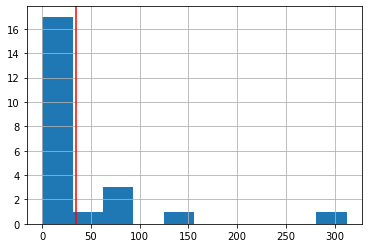

In [9]:
# get an industry-specific mean value for a financial indicator
indicator = 'PE'
industry = 'Communication Components Manufacturers'

getMeanIndicator(Df, indicator, industry)

# Df[(Df.indicator == indicator) & (Df.industry == industry) & (Df.date == '2020-09-25')]

ADI
IPHI
MCHP
MPWR
MTSI
MX
MXIM
MXL
NXPI
ON
SLAB
SMTC


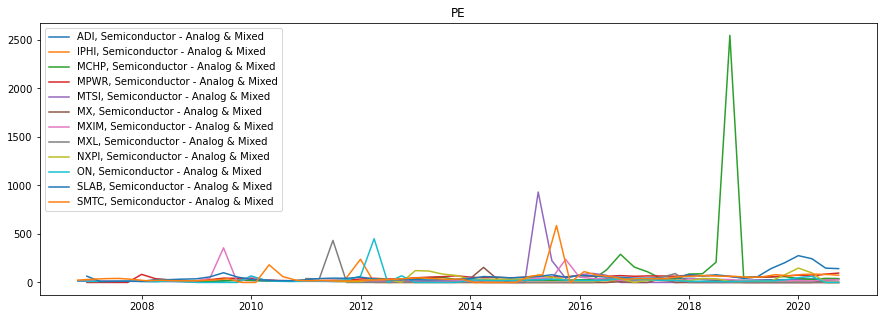

In [10]:
# compare an indicator within an entire industy over time
indicator = 'PE'
industry = 'Semiconductor - Analog & Mixed'
compareByIndustry(Df, indicator, industry)

In [11]:
def subsetByCompany(Df, ticker, trange):
    sub = Df[(Df.ticker == ticker)]
    val = sub.value.to_numpy()
    date = sub.date.to_list()
    return date, val

In [12]:
st = datetime(year=2015, month=1, day=1)
en = datetime(year=2018, month=1, day=1)
lookahead = en + relativedelta(years=2)

print(st, en, lookahead, sep='\n')

2015-01-01 00:00:00
2018-01-01 00:00:00
2020-01-01 00:00:00


In [327]:
np.seterr(all='raise')

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

def getXY(Df, ticker, st_year, en_year, indicators=[], num_lookahead_yrs=2):
    st = datetime(year=st_year, month=1, day=1)
    en = datetime(year=en_year, month=1, day=1)
    lookahead = en + relativedelta(years=num_lookahead_yrs)
#     print(st.year, en.year, lookahead.year)
    sub = Df[(Df.ticker == ticker)].sort_values(by='date')
    sub1 = sub[(st <= sub.date) & (sub.date <= en)].drop(columns=['comp_name', 'industry', 'ticker'])
#     qq = np.unique(sub1.date.to_numpy())
    sub1 = sub1.pivot_table(index='date', columns='indicator', values='value')
    arr = sub1.to_numpy()

    # subset the needed indicators:
    idx = []
    for i in indicators:
        try:
            idx.append(sub1.columns.to_list().index(i))
        except:
            return np.nan, np.nan, f'{ticker}: {i} not found in this time range'

    # check forn nans:
    arr = arr[:,idx]
    nancheck = np.sum(arr)
    if nancheck != nancheck:
        return np.nan, np.nan, f'{ticker}: All indicators present but there are NaNs'
    
    # normalize non-ratios:
    non_ratios = ['long-term-debt', 'net-income','operating-income', 'revenue', 'ebitda']
    fix_ids = []
    for i in non_ratios:
        if i in indicators:
            fix_ids.append(indicators.index(i))
    for i in fix_ids:
        try:
            arr[:,i] /= arr[0,i]
        except:
            return np.nan, np.nan, f'{ticker}: All indicators present, but normization leads to division by zero'
    
    # check for invalid values (zeros in ratios) !!!!!!! TODO ONLY in ratios!
    if (arr.size - np.count_nonzero(arr)) > 0:
        bad_cols = []
        for column, indicator in enumerate(indicators):
            if arr[:,column].size - np.count_nonzero(arr[:,column]) > 0:
                bad_cols.append(indicator)
        return np.nan, np.nan, f'{ticker}: Zero(s) detected for {bad_cols})'
    
    if np.any(np.isinf(arr)):
        return np.nan, np.nan, f'{ticker}: Inf detected'
    
    # stock price change in the future:
    sub2 = sub[(en <= sub.date) & (sub.date <= lookahead)].drop(columns=['comp_name', 'industry', 'ticker'])
    prices = sub2[sub2.indicator == 'stockPrice'].value.to_list()
#     popt, pcov = curve_fit(f, range(len(prices)), prices) # your data x, y to fit
    ROI = ((prices[-1]-prices[0])/prices[0])/((lookahead - en).days/365.2425) * 100
#     print(np.datetime_as_string(qq.min(), unit='D'),
#           np.datetime_as_string(qq.max(), unit='D'))
    return arr, ROI, f'{ticker}: aOK'

In [365]:
# create dataset for the neural network
# RUN THIS CELL ONLY IF YOU WANT THE REBUILD THE DATASET FOR TRAINING A MODEL
num_lookahead_yrs = 2
st_year = 2016
en_year = 2018

indicators = ['revenue', 'operating-income', 'total-liabilities', 'total-assets',
       'net-income', 'CurrentRatio', 'CurrentLiabilities',
       'CurrentAssets', 'total-share-holder-equity', 'cash-on-hand', 'DE',
       'ttmSalesPerShare', 'PE', 'ttmNetEPS', 'ROE',
       'ttmNetIncome', 'ROA', 'PB',
       'BVPS', 'ttmFCFps', 'stockPrice']

# X, Y, C = [], [], []
# tickers = np.unique(Df.ticker.to_list())
# if 'monitor.txt' in os.listdir():
#     os.remove('monitor.txt')
    
# for i, ticker in enumerate(tickers):
#     A, ROI, status = getXY(Df, ticker, st_year=st_year, en_year=en_year, indicators=indicators, num_lookahead_yrs=num_lookahead_yrs)
#     with open('monitor.txt', 'a') as file:
#         file.writelines(f'{i},{ticker}: {status}\n')
#     if status[-3:] == 'aOK':
#         C.append(ticker)
#         X.append(A)
#         Y.append(ROI)

In [366]:
# Dump the data to disk:
# RUN THIS CELL ONLY IF YOU WANT THE REBUILD THE DATASET FOR TRAINING A MODEL

# X_, Y_, C_ = [], [], []
# for j, i in enumerate(X):
#     if X[j].shape == (8,21):
#         X_.append(X[j])
#         Y_.append(Y[j])
#         C_.append(C[j])
# with open('dat4nn.pkl', 'wb') as f:
#     pickle.dump({'C': C_, 'X': X_, 'Y': Y_}, f)
# print(f"Shape of C: {np.stack(C_).shape}")
# print(f"Shape of X: {np.stack(X_).shape}")
# print(f"Shape of Y: {np.stack(Y_).shape}")

Length of X: 1203


Text(6.425151922881764, 70, 'mean: 6.425151922881764')

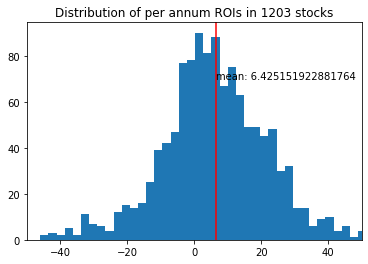

In [378]:
# OTHERWISE, LOAD THE READY DATASET FOR THE TRAINING OF A MODEL:

with open('dat4nn.pkl', 'rb') as f:
# with open('dat4nndat4nn_2015_2018_2020.pkl', 'rb') as f:
# with open('dat4nndat4nn_2014_2017_2019.pkl', 'rb') as f:
# with open('dat4nndat4nn_2013_2016_2018.pkl', 'rb') as f:
    dat = pickle.load(f)
C = dat['C']
X = dat['X']
Y = dat['Y']

print(f'Length of X: {len(X)}')
_ = plt.hist(Y, bins=50)
plt.xlim(-50, 50)
plt.title(f'Distribution of per annum ROIs in {len(Y)} stocks')
mu = np.mean(Y)
plt.axvline(mu, c='red')
plt.text(mu, 70, f'mean: {mu}')

In [379]:
# worst performers

Y_ = np.array(Y)
C_ = np.array(C)
worst_performer_ids = np.nonzero(Y_ < -20)[0]
worst_performers = C_[worst_performer_ids]

for i in worst_performer_ids:
    ticker = C_[i]
    indus = df[df.ticker==ticker].zacks_x_ind_desc.item()
    name = df[df.ticker==ticker].comp_name.item()
    country = df[df.ticker==ticker].country_code.item()
    roi = Y_[i]
    print('{}\t{:.1f}%\t{}\t{}\t{}'.format(ticker,roi, country, name, indus))

AAL	-21.9%	United States	american-airlines-group	Transportation - Airlines
AAOI	-26.3%	United States	applied-optoelectronics	Semiconductors
ADS	-22.9%	United States	alliance-data-systems	Financial Transaction Services
AKRXQ	-46.0%	United States	akorn	Medical - Generic Drugs
AMG	-27.2%	United States	affiliated-managers	Finance - Investment Management
BAK	-20.4%	Brazil	braskem-sa	Oil & Gas - International Integrated
BBAR	-37.3%	Argentina	bbva-banco-frances-sa	Banks - Foreign
BBGI	-35.1%	United States	beasley-broadcast	Broadcasting - Radio & TV
BGGSQ	-33.4%	United States	briggs-stratton	Farm Machinery
BIG	-31.0%	United States	big-lots	Retail - Discount & Variety
CBL	-35.2%	United States	cbl-associates-properties	REIT - Retail Equity Trusts
CLB	-31.6%	Netherlands	core-laboratories	Oil & Gas -  Field Services
CMT	-40.9%	United States	core-molding-technologies-inc	Rubber & Plastic Products
CPS	-36.5%	United States	cooper-standard-holdings	Auto & Truck Original Equipment Manufacturers
CXDC	-2

In [380]:
# IF THE CUDA MESSES AROUND, RUN
# sudo rmmod nvidia_uvm
# sudo modprobe nvidia_uvm

import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms

indicators = ['revenue', 'operating-income', 'total-liabilities', 'total-assets',
       'net-income', 'CurrentRatio', 'CurrentLiabilities',
       'CurrentAssets', 'total-share-holder-equity', 'cash-on-hand', 'DE',
       'ttmSalesPerShare', 'PE', 'ttmNetEPS', 'ROE',
       'ttmNetIncome', 'ROA', 'PB',
       'BVPS', 'ttmFCFps', 'stockPrice']

device = 'cuda'
for j,i in enumerate(indicators):
    print(j, i)

0 revenue
1 operating-income
2 total-liabilities
3 total-assets
4 net-income
5 CurrentRatio
6 CurrentLiabilities
7 CurrentAssets
8 total-share-holder-equity
9 cash-on-hand
10 DE
11 ttmSalesPerShare
12 PE
13 ttmNetEPS
14 ROE
15 ttmNetIncome
16 ROA
17 PB
18 BVPS
19 ttmFCFps
20 stockPrice


In [381]:
# SPECIFY FOR WHICH INDICATORS YOU WANT TO GET ONLY THE SLOPES (ALL NON-RATIOS)
# AND FOR WHICH SLOPES AND BIASES (ALL RATIOS)
slopes = [0,1,2,4,5,7,9,11,14,15,16]
slAndBias = [3,6,8,10,12,13,17]

# slopes = [0,1,2,3,4,6,7,8,9,11,13,15,18,19,20]
# slAndBias = [5,10,12,14,16,17]

In [382]:
# TRANSFORM THE TIME SERIES DATA BIAS-SLOPE, THEN TO Z-SCORES (COLUMN-WISE)
num_quarters = 8

from sklearn import preprocessing

def tranform2coeff(X, varid):
    x = np.arange(0,num_quarters,1).reshape(-1,1) # 12 stands for the number of quarters (3 years  by 4 Q)
    y = X[:, varid].reshape(-1,1)
    l = len(x)
    x = np.concatenate([x, np.ones((l,1))], axis=1)
    beta = (np.linalg.inv(np.dot(x.T, x))).dot(x.T).dot(y)
    return beta[0,0], beta[1,0]

col_labels = []
def transform(X):
    global col_labels, indicators
    col_labels = []
    case, col_labels = [],[]
    for var_id in slAndBias:
        k,b = tranform2coeff(X, var_id)
        case.append(k)
        col_labels.append(indicators[var_id]+'_slope')
        case.append(b)
        col_labels.append(indicators[var_id]+'_bias')
    for var_id in slopes:
        k,b = tranform2coeff(X, var_id)
        case.append(k)
        col_labels.append(indicators[var_id]+'_slope')     
    return case


with open('dat4nn.pkl', 'rb') as f:
# with open('dat4nndat4nn_2015_2018_2020.pkl', 'rb') as f:

    dat = pickle.load(f)
X_ = dat['X']



# calculate L/A, get rid of total-assets, total-liabilities
# CurrentAssets and CurrentLiabilities (their ratio is already in the CurrentRatio)
i = indicators.index('total-assets')
j = indicators.index('total-liabilities')
a = indicators.index('CurrentAssets')
b = indicators.index('CurrentLiabilities')
for n in range(len(X)):
    LA = X_[n][:,j]/X_[n][:,i]
    X_[n] = np.delete(X_[n],[i,j,a,b], axis=1)
    X_[n] = np.hstack([X_[n], LA.reshape(-1,1)])
indicators = [y for x,y in enumerate(indicators) if x not in [i,j,a,b]]
indicators.append('LA')
for i,j in enumerate(indicators):
    print(i,j)


Y = dat['Y']
X = []
X = list(map(transform, X_))
X = np.stack(X)
Y = np.stack(Y)

# min_max_scaler = preprocessing.MinMaxScaler()
# X_scaled = min_max_scaler.fit_transform(X)
z_transform = preprocessing.StandardScaler()
X_scaled = z_transform.fit_transform(X)
Y_scaled = z_transform.fit_transform(Y.reshape(-1,1))


print(X.shape)
print(Y.shape)

print(len(col_labels))
col_labels


0 revenue
1 operating-income
2 net-income
3 CurrentRatio
4 total-share-holder-equity
5 cash-on-hand
6 DE
7 ttmSalesPerShare
8 PE
9 ttmNetEPS
10 ROE
11 ttmNetIncome
12 ROA
13 PB
14 BVPS
15 ttmFCFps
16 stockPrice
17 LA
(1203, 25)
(1203,)
25


['CurrentRatio_slope',
 'CurrentRatio_bias',
 'DE_slope',
 'DE_bias',
 'PE_slope',
 'PE_bias',
 'ROE_slope',
 'ROE_bias',
 'ROA_slope',
 'ROA_bias',
 'PB_slope',
 'PB_bias',
 'LA_slope',
 'LA_bias',
 'revenue_slope',
 'operating-income_slope',
 'net-income_slope',
 'total-share-holder-equity_slope',
 'cash-on-hand_slope',
 'ttmSalesPerShare_slope',
 'ttmNetEPS_slope',
 'ttmNetIncome_slope',
 'BVPS_slope',
 'ttmFCFps_slope',
 'stockPrice_slope']

Text(22.834141529746407, 200, 'Cutoff perf.: 22.83% per annum')

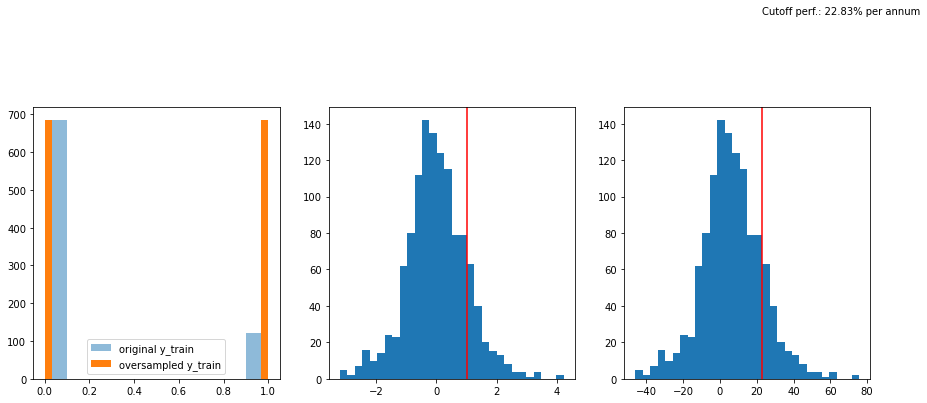

In [383]:
# OVERSAMPLE THE UNDERREPRESENTED CLASS
# SPECIFY THE THRESHOLD BETWEEN CLASSES (I.E. WHAT MINIMUM ROI PER ANNUM MAKES A DIFFERENCE
# BETWEEN A WELL AND AND POORLY PERFORMING STOCK)

# oversample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)

theta = 1.0 # in standard deviations
y = np.array([1 if i > theta else 0 for i in Y_scaled])
x_train, x_test, y_train, y_test, c_train, c_test = train_test_split(X_scaled, y, range(len(y)), test_size=0.33, random_state=42)

# oversample the minority class to make the training set balanced class-wise
x_train_os, y_train_os = oversampler.fit_sample(x_train, y_train)
x_test_os, y_test_os = oversampler.fit_sample(x_test, y_test)

# convert to tensors
x_train_os = torch.tensor(x_train_os).reshape(-1, len(col_labels)).to(torch.float32).to(device)
x_test_os = torch.tensor(x_test_os).reshape(-1, len(col_labels)).to(torch.float32).to(device)
y_train_os = F.one_hot(torch.tensor(y_train_os).to(torch.int64), num_classes=2).to(torch.float32).to(device)
y_test_os = F.one_hot(torch.tensor(y_test_os).to(torch.int64), num_classes=2).to(torch.float32).to(device)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(y_train, alpha=0.5, label='original y_train')
plt.hist(y_train_os[:,0].cpu().detach().numpy(), bins=30, label='oversampled y_train')
plt.legend()
plt.subplot(1,3,2)
plt.hist(Y_scaled, bins=30)
plt.axvline(theta, c='red')
plt.subplot(1,3,3)
_ = plt.hist(Y, bins=30)
sigma = np.std(Y)
plt.axvline(np.mean(Y) + theta*sigma, c='red')
plt.text(np.mean(Y) + theta*sigma, 200, 'Cutoff perf.: {:.2f}% per annum'.format(np.mean(Y) + theta*sigma))

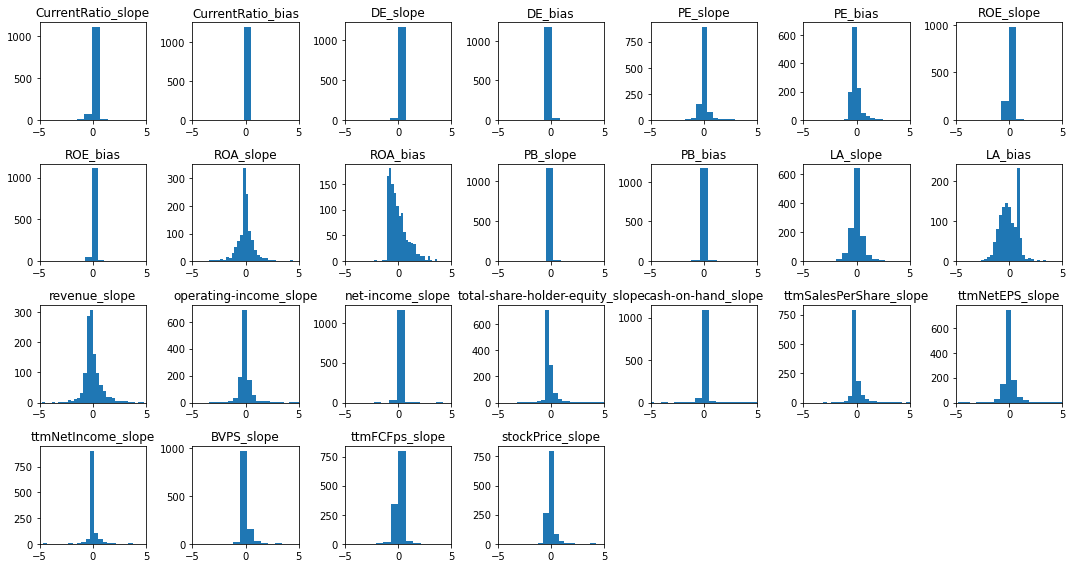

In [384]:
# SEE THE DISTRIBUTIONS OF PREDICTOR VARIABLES

plt.figure(figsize=(15,8))
for i in range(len(col_labels)):
    plt.subplot(4,7,i+1)
    plt.hist(X_scaled[:,i], bins=50)
    plt.title(col_labels[i])
    plt.xlim(-5,5)
plt.tight_layout()

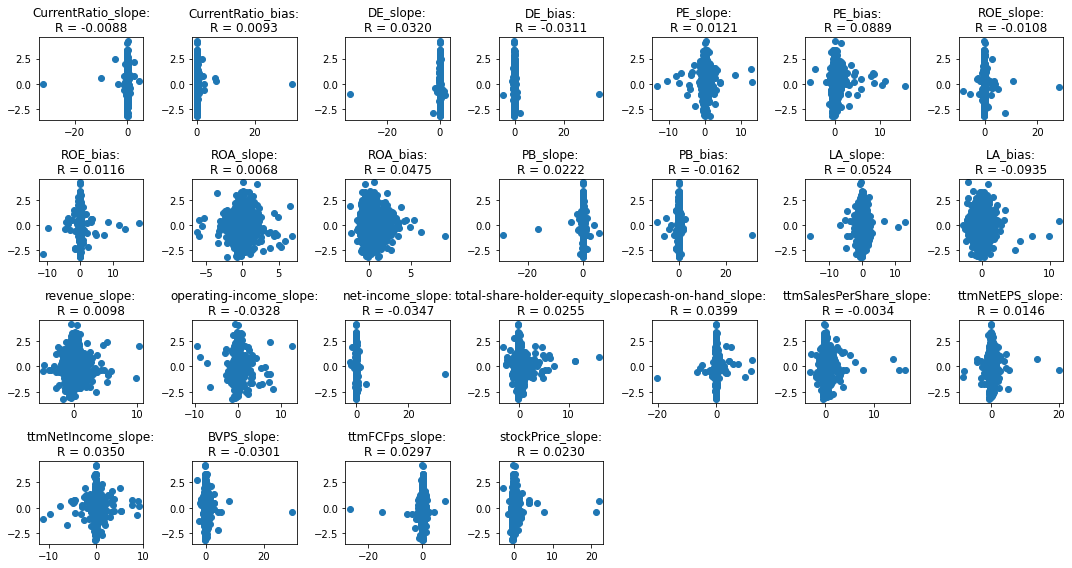

In [385]:
# SEE HOW PRIDICTORS CORRELATE WITH THE DEPENDENT VARIABLE (ROI PER ANNUM)

plt.figure(figsize=(15,8))
for idx, label in enumerate(col_labels):
    plt.subplot(4,7,idx+1)
    plt.scatter(X_scaled[:,idx], Y_scaled)
    plt.title('{}:\nR = {:.4f}'.format(label, np.corrcoef(X_scaled[:,idx], Y_scaled.flatten())[1,0]))
plt.tight_layout()

In [374]:
# DEFINE THE NETWORK

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(col_labels), 6)
        self.fc2 = nn.Linear(6, 3)
        self.do = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(3, 2)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.do(torch.tanh(self.fc2(x)))
        x = F.softmax(self.fc3(x), dim=1)
        return x

net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=25, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=3, bias=True)
  (do): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=3, out_features=2, bias=True)
)


In [388]:
y_test_os.shape

torch.Size([680, 2])

In [389]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

l = 20.95
for i in range(100000):
    try:
        optimizer.zero_grad()
        l2_loss = 0
#         pred_train = net.forward(torch.tensor(x_train_os).to(device))
        pred_train = net.forward(x_train_os)
        for param in net.parameters():
            l2_loss += 0.5 * (param ** 2).sum()
#         train_loss = F.binary_cross_entropy(pred_train, torch.tensor(y_train_os).to(device), reduction='sum') + l * l2_loss
        train_loss = F.binary_cross_entropy(pred_train, y_train_os, reduction='sum') + l * l2_loss


        if i%100==0:
            pred_test = net.forward(x_test_os)
            test_loss = F.binary_cross_entropy(pred_test, y_test_os, reduction='sum')
            train_acc = (y_train_os == pred_train.round().to(torch.float32))[:,0].sum().item() / y_train_os.shape[0]
            test_acc = (y_test_os == pred_test.round().to(torch.float32))[:,0].sum().item() / y_test_os.shape[0]
            print('{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\r'.format(train_loss.item(), test_loss.item(), train_acc, test_acc), end="")
        train_loss.backward()
        optimizer.step()
    except KeyboardInterrupt:
        print('KB interrupt')
        break
        
    

KB interrupt.52	0.83	0.58


TP 19
FP 101
TN 239
FN 38


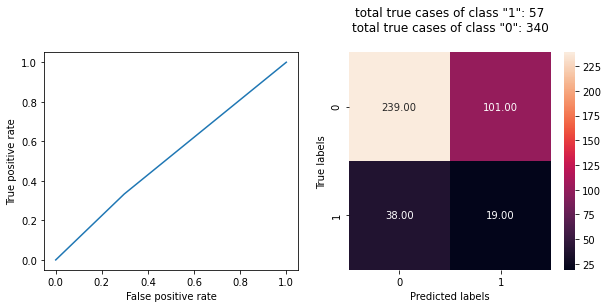

In [390]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, plot_confusion_matrix
import seaborn as sn

pred = net.forward(torch.tensor(x_test, dtype=torch.float).to(device)).to('cpu').detach().numpy().round()
y_ = F.one_hot(torch.tensor(y_test).to(torch.int64), num_classes=2).to('cpu').detach().numpy()

fpr, tpr, thresholds = roc_curve(y_[:,1], pred[:,1])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

cm = confusion_matrix(y_[:,1], pred[:,1], labels=range(2)) #, normalize='true'

plt.subplot(1,2,2)
sn.heatmap(cm, annot=True, fmt='.2f')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('total true cases of class "1": {}\ntotal true cases of class "0": {}\n'.format(np.sum(y_test==1), np.sum(y_test==0)))

TP, TN, FP, FN = 0,0,0,0
for pr, gt in zip (pred[:,1], y_test):
    if pr == gt:
        if pr == 0:
            TN += 1 
        if pr == 1:
            TP += 1
    if pr != gt:
        if pr == 1:
            FP += 1
        if pr == 0:
            FN += 1
print('TP {}\nFP {}\nTN {}\nFN {}'.format(TP, FP, TN, FN))

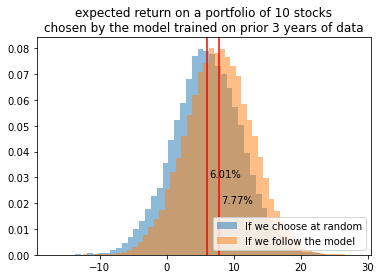

In [391]:
pred = net.forward(torch.tensor(X_scaled[c_test,:], dtype=torch.float).to(device)).to('cpu').detach().numpy().round()
tmpy = Y[c_test] # ROIs in the test set
pr_good_ids = range(len(pred[:,1])) # the ids of good predictions
ROI = []
for j in range(30000):
     # make a portfolio that according to the model must be good
    rois = tmpy[np.random.choice(pr_good_ids, 10, replace=False)]
    ROI.append(np.mean(rois))
_ = plt.hist(ROI, bins=50, density=True, alpha=0.5, label='If we choose at random')
plt.axvline(np.mean(ROI), color='red')
plt.text(np.mean(ROI)+0.3, 0.03, '{:.2f}%'.format(np.mean(ROI)))


pr_good_ids = np.nonzero(pred[:,1]==1)[0] # the ids of good predictions
ROI = []
for j in range(30000):
     # make a portfolio that according to the model must be good
    rois = tmpy[np.random.choice(pr_good_ids, 10, replace=False)]
    ROI.append(np.mean(rois))
_ = plt.hist(ROI, bins=50, density=True, alpha=0.5, label='If we follow the model')
plt.axvline(np.mean(ROI), color='red')
plt.text(np.mean(ROI)+0.3, 0.02, '{:.2f}%'.format(np.mean(ROI)))

plt.title('expected return on a portfolio of 10 stocks\nchosen by the model trained on prior 3 years of data')
plt.legend(loc='lower right')

In [26]:
pred_test = net.forward(x_test_os)
for i,j in zip(pred_test, y_test_os):
    print(i.cpu().detach().numpy().round(), j.cpu().detach().numpy())

[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[1. 0.] [0. 1.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [0. 1.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[0. 1.] [0. 1.]
[0. 1.] [0. 1.]
[0. 1.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [0. 1.]
[0. 1.] [1. 0.]
[0. 1.] [0. 1.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] [1. 0.]
[1. 0.] 

# TODO
- try subsetting stocks from certain industries
- try scraping more data (say, 4x more data)
- try SVM
- try random forest
- try naive Bayes
- try Ensembles of Decision Trees


# Decision Tree Classification

In [347]:
# NOW LET'S SEE IF A DECISION TREE CAN DO A BETTER JOB ON THE SAME DATA:

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)


theta = 1.0 # in standard deviations
y = np.array([1 if i > theta else 0 for i in Y_scaled])
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# oversample the minority class to make the training set balanced class-wise
x_train_os, y_train_os = oversampler.fit_sample(x_train, y_train)
x_test_os, y_test_os = oversampler.fit_sample(x_test, y_test)



# clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# clf = clf.fit(x_train_os, y_train_os)
# y_pred = clf.predict(x_test_os)
# print("Accuracy:", metrics.accuracy_score(y_test_os, y_pred))

[False False False False False  True False False False  True False False
  True False False False False False False False False False False False
 False False False]
[25 24 23 22 21  1 14  2 13  1 12  5  1 16 18 20 19 17 15  4 11 10  3  9
  8  7  6]
[(5, 'PE_bias'), (9, 'ROA_bias'), (12, 'revenue_slope')]
Accuracy: 0.5982758620689655
Accuracy: 0.5120689655172413


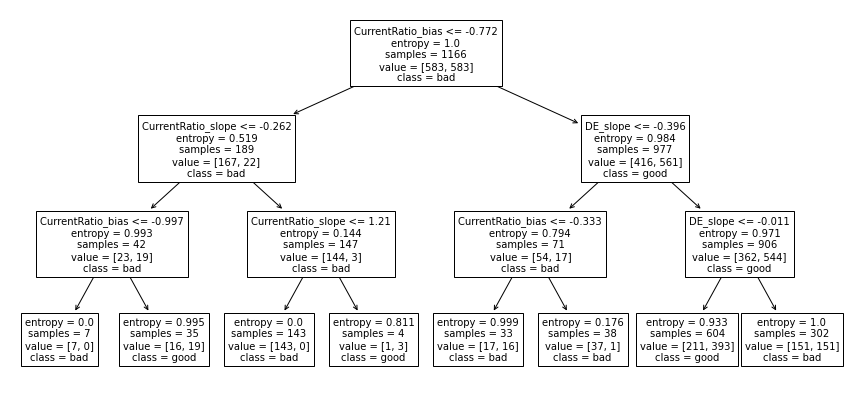

In [348]:
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
rfe = RFE(clf, n_features_to_select=3)
rfe = rfe.fit(x_train_os, y_train_os)
print(rfe.support_)
print(rfe.ranking_)
print([(i,j) for i,j in enumerate(col_labels) if rfe.ranking_[i] == 1])

y_pred = rfe.predict(x_test_os)
print("Accuracy:", metrics.accuracy_score(y_test_os, y_pred))

best_features = np.array([4,9,21])

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train_os[:, best_features], y_train_os)
y_pred = clf.predict(x_test_os[:, best_features])
print("Accuracy:", metrics.accuracy_score(y_test_os, y_pred))


plt.figure(figsize=(15,7))
from sklearn import tree
_ = tree.plot_tree(clf,
                   fontsize=10,
                   class_names=['bad', 'good'],
                   feature_names = col_labels)


Accuracy: 0.5086206896551724


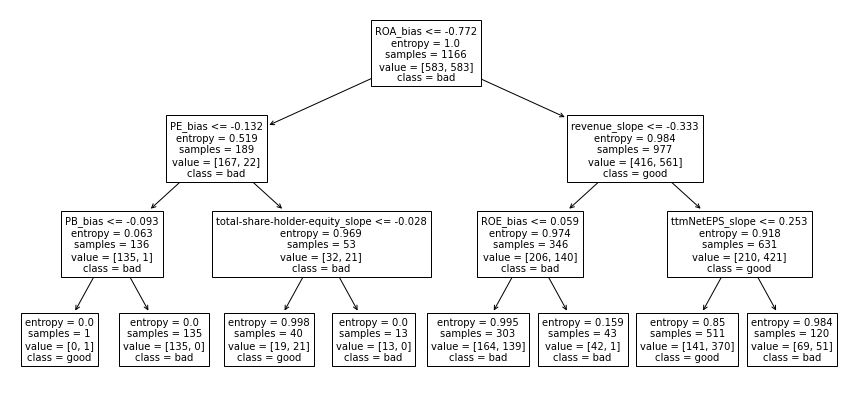

In [349]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train_os, y_train_os)
y_pred = clf.predict(x_test_os)
print("Accuracy:", metrics.accuracy_score(y_test_os, y_pred))

plt.figure(figsize=(15,7))
from sklearn import tree
_ = tree.plot_tree(clf,
                   fontsize=10,
                   class_names=['bad', 'good'],
                   feature_names = col_labels)
